<a href="https://colab.research.google.com/github/The-Godfatherr/LAB-AIML/blob/main/Lab_8_Abhinav_Verma_E23CSEU1335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

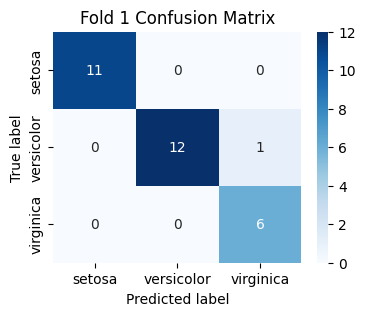

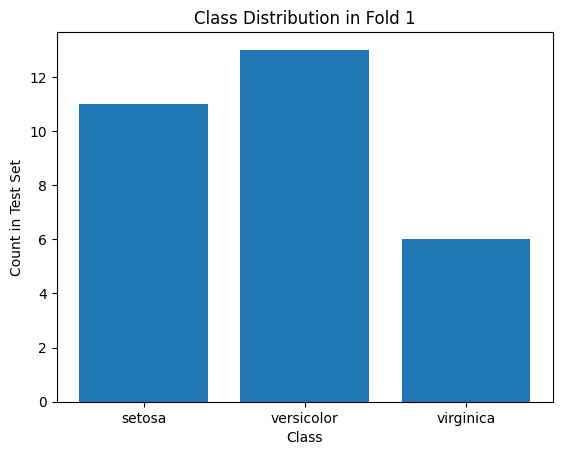

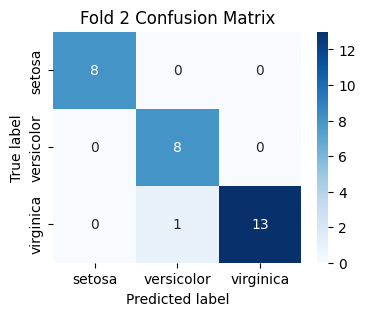

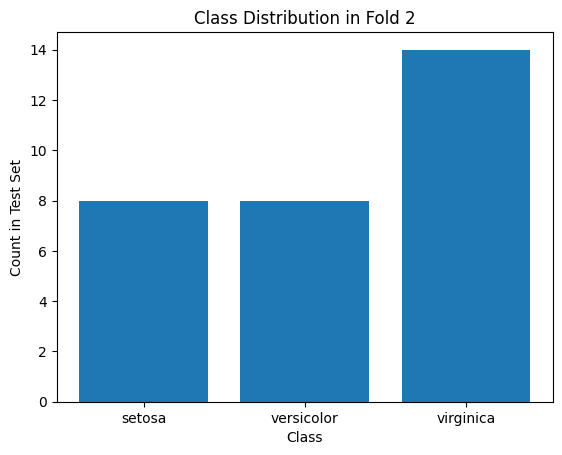

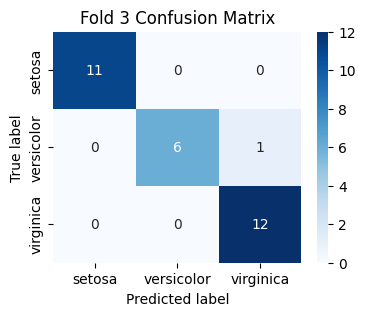

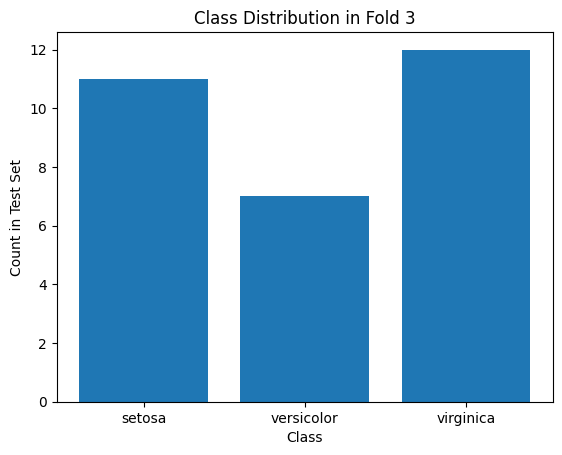

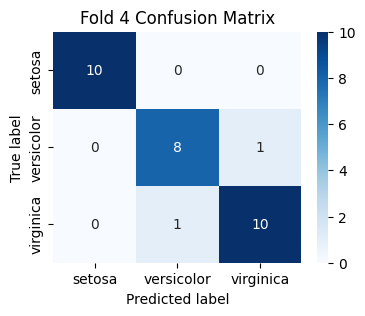

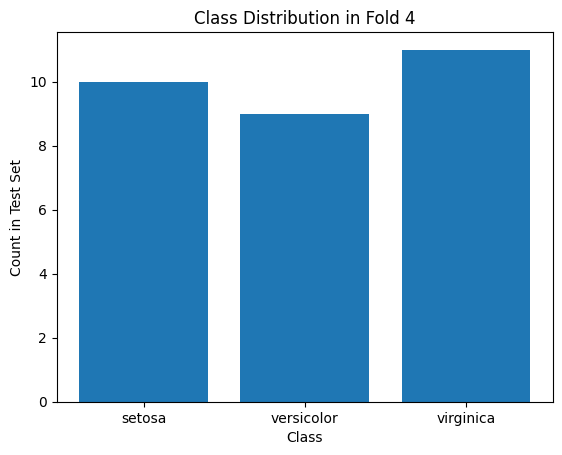

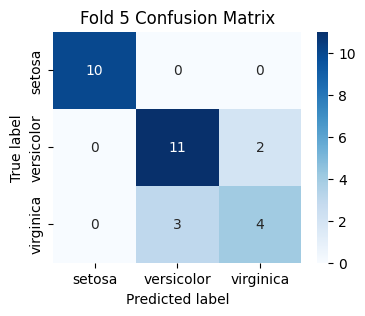

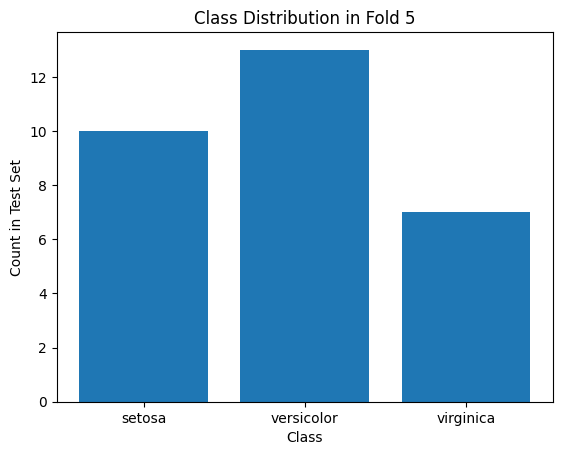

Average Accuracy: 0.933
Average Precision: 0.928
Average Recall: 0.928
Average F1-score: 0.927


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Iris data
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 2. Initialize classifier
clf = DecisionTreeClassifier(random_state=42)

# 3. Setup KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Track metrics for all folds
all_metrics = []
fold = 1

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    all_metrics.append([acc, prec, rec, f1])

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Fold {fold} Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Class distribution in fold
    unique, counts = np.unique(y_test, return_counts=True)
    plt.bar(class_names[unique], counts)
    plt.title(f'Class Distribution in Fold {fold}')
    plt.xlabel('Class')
    plt.ylabel('Count in Test Set')
    plt.show()

    fold += 1

# Report average metrics
all_metrics = np.array(all_metrics)
print(f"Average Accuracy: {all_metrics[:,0].mean():.3f}")
print(f"Average Precision: {all_metrics[:,1].mean():.3f}")
print(f"Average Recall: {all_metrics[:,2].mean():.3f}")
print(f"Average F1-score: {all_metrics[:,3].mean():.3f}")
